## Learning Objectives 

* Develop a function: if a block of code will be re-used several times, develop it as a function to avoid coding errors.
* ROC/AUC
* VARImp
* Train and test your model with a small dataset.
* Model with the entire dataset when there is no error.
* Keep your notebook clean and readable.
* GLM
* See this [H2o GLM tutorial](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/glm.html), [this one](http://docs.h2o.ai/h2o-tutorials/latest-stable/tutorials/glm/glm.html) or [this one](https://h2o-release.s3.amazonaws.com/h2o/master/3252/docs-website/h2o-docs/booklets/GLM_Vignette.pdf)

In [39]:
import numpy as np
import datetime
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [40]:
data = pd.read_csv("//Users/Chriskuo/Downloads/XYZloan_default_selected_vars.csv")

In [41]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(
     data, test_size=0.40, random_state=42)

In [42]:
train.shape

(48000, 90)

In [43]:
train.dtypes

Unnamed: 0          int64
Unnamed: 0.1        int64
Unnamed: 0.1.1      int64
id                  int64
loan_default        int64
AP001               int64
AP002               int64
AP003               int64
AP004               int64
AP005              object
AP006              object
AP007               int64
AP008               int64
AP009               int64
TD001               int64
TD002               int64
TD005               int64
TD006               int64
TD009               int64
TD010               int64
TD013               int64
TD014               int64
TD015               int64
TD022             float64
TD023             float64
TD024             float64
TD025             float64
TD026             float64
TD027             float64
TD028             float64
                   ...   
CD107             float64
CD108             float64
CD113             float64
CD114             float64
CD115             float64
CD117             float64
CD118             float64
CD120       

In [44]:
var = pd.DataFrame(train.dtypes)
var.head(10)

,0
Unnamed: 0,int64
Unnamed: 0.1,int64
Unnamed: 0.1.1,int64
id,int64
loan_default,int64
AP001,int64
AP002,int64
AP003,int64
AP004,int64
AP005,object


In [45]:
var = pd.DataFrame(train.dtypes).reset_index()
var.head()

,index,0
0,Unnamed: 0,int64
1,Unnamed: 0.1,int64
2,Unnamed: 0.1.1,int64
3,id,int64
4,loan_default,int64


In [46]:
var.columns = ['varname','dtype'] 
var.head(10)

,varname,dtype
0,Unnamed: 0,int64
1,Unnamed: 0.1,int64
2,Unnamed: 0.1.1,int64
3,id,int64
4,loan_default,int64
5,AP001,int64
6,AP002,int64
7,AP003,int64
8,AP004,int64
9,AP005,object


In [47]:
var['source'] = var['varname'].str[:2]
var.head()

,varname,dtype,source
0,Unnamed: 0,int64,Un
1,Unnamed: 0.1,int64,Un
2,Unnamed: 0.1.1,int64,Un
3,id,int64,id
4,loan_default,int64,lo


In [48]:
var['source'].value_counts()

CD    36
TD    24
AP     9
CR     8
PA     6
Un     3
MB     2
lo     1
id     1
Name: source, dtype: int64

In [49]:
# "AP004" is a bad data field and should be removed.
MB_list = list(var[var['source']=='MB']['varname'])
AP_list = list(var[(var['source']=='AP') & (var['varname']!='AP004')]['varname'])
TD_list = list(var[var['source']=='TD']['varname'])
CR_list = list(var[var['source']=='CR']['varname'])
PA_list = list(var[var['source']=='PA']['varname'])
CD_list = list(var[var['source']=='CD']['varname'])
AP_list

['AP001', 'AP002', 'AP003', 'AP005', 'AP006', 'AP007', 'AP008', 'AP009']

In [50]:
train['loan_default'].value_counts(dropna=False)

0    38736
1     9264
Name: loan_default, dtype: int64

# H2O

* If you encounter errors, [this page](https://h2o-release.s3.amazonaws.com/h2o/rel-yates/5/index.html) may help.

In [51]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,24 mins 44 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.5
H2O cluster version age:,4 months and 28 days !!!
H2O cluster name:,H2O_from_python_chriskuo_axau69
H2O cluster total nodes:,1
H2O cluster free memory:,1.706 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


In [52]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

In [53]:
target='loan_default'

### When you model, you should run with a small sample dataset

* Try to write repeating code in a function

In [80]:
train_smpl = train.sample(frac=0.1, random_state=1)
test_smpl = test.sample(frac=0.1, random_state=1)
train_hex = h2o.H2OFrame(train_smpl)
test_hex = h2o.H2OFrame(test_smpl)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [81]:
predictors = CR_list + TD_list + AP_list + MB_list + CR_list + PA_list 

In [105]:
glm_v1 = H2OGeneralizedLinearEstimator(family= "binomial", lambda_ = 0.05) #, compute_p_values = True)
glm_v1.train(predictors,target,training_frame=train_hex)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [106]:
glm_v1.predict(test_hex)

glm prediction progress: |████████████████████████████████████████████████| 100%


predict,p0,p1
1,0.797385,0.202615
1,0.806457,0.193543
0,0.82972,0.17028
0,0.830834,0.169166
0,0.831598,0.168402
1,0.795778,0.204222
0,0.828389,0.171611
1,0.780149,0.219851
0,0.82988,0.17012
0,0.844644,0.155356


In [107]:
glm_v1.predict(test_hex)['p1']

glm prediction progress: |████████████████████████████████████████████████| 100%


p1
0.202615
0.193543
0.17028
0.169166
0.168402
0.204222
0.171611
0.219851
0.17012
0.155356


In [108]:
predictions = glm_v1.predict(test_hex)['p1']
test_scores = test_hex['loan_default'].cbind(predictions).as_data_frame()
test_scores.head()

glm prediction progress: |████████████████████████████████████████████████| 100%


,loan_default,p1
0,0,0.202615
1,0,0.193543
2,0,0.170280
3,0,0.169166
4,0,0.168402


In [109]:
def createGains(model):
    predictions = model.predict(test_hex)['p1']
    test_scores = test_hex['loan_default'].cbind(predictions).as_data_frame()

    #sort on prediction (descending), add id, and decile for groups containing 1/10 of datapoints
    test_scores = test_scores.sort_values(by='p1',ascending=False)
    test_scores['row_id'] = range(0,0+len(test_scores))
    test_scores['decile'] = ( test_scores['row_id'] / (len(test_scores)/10) ).astype(int)
    #see count by decile
    test_scores.loc[test_scores['decile'] == 10]=9
    test_scores['decile'].value_counts()

    #create gains table
    gains = test_scores.groupby('decile')['loan_default'].agg(['count','sum'])
    gains.columns = ['count','actual']
    gains

    #add features to gains table
    gains['non_actual'] = gains['count'] - gains['actual']
    gains['cum_count'] = gains['count'].cumsum()
    gains['cum_actual'] = gains['actual'].cumsum()
    gains['cum_non_actual'] = gains['non_actual'].cumsum()
    gains['percent_cum_actual'] = (gains['cum_actual'] / np.max(gains['cum_actual'])).round(2)
    gains['percent_cum_non_actual'] = (gains['cum_non_actual'] / np.max(gains['cum_non_actual'])).round(2)
    gains['if_random'] = np.max(gains['cum_actual']) /10 
    gains['if_random'] = gains['if_random'].cumsum()
    gains['lift'] = (gains['cum_actual'] / gains['if_random']).round(2)
    gains['K_S'] = np.abs( gains['percent_cum_actual'] -  gains['percent_cum_non_actual'] ) * 100
    gains['gain']=(gains['cum_actual']/gains['cum_count']*100).round(2)
    gains = pd.DataFrame(gains)
    return(gains)

createGains(glm_v1)

glm prediction progress: |████████████████████████████████████████████████| 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,320,101,219,320,101,219,0.17,0.08,60.0,1.68,9.0,31.56
1,320,61,259,640,162,478,0.27,0.18,120.0,1.35,9.0,25.31
2,320,80,240,960,242,718,0.40,0.28,180.0,1.34,12.0,25.21
3,320,77,243,1280,319,961,0.53,0.37,240.0,1.33,16.0,24.92
4,320,54,266,1600,373,1227,0.62,0.47,300.0,1.24,15.0,23.31
5,320,58,262,1920,431,1489,0.72,0.57,360.0,1.20,15.0,22.45
6,320,46,274,2240,477,1763,0.80,0.68,420.0,1.14,12.0,21.29
7,320,51,269,2560,528,2032,0.88,0.78,480.0,1.10,10.0,20.62
8,320,39,281,2880,567,2313,0.94,0.89,540.0,1.05,5.0,19.69


In [110]:
def ROC_AUC(my_result,df,target):
    from sklearn.metrics import roc_curve,auc
    from sklearn.metrics import average_precision_score
    from sklearn.metrics import precision_recall_curve
    import matplotlib.pyplot as plt

    # ROC
    y_actual = df[target].as_data_frame()
    y_pred = my_result.predict(df)['p1'].as_data_frame()
    fpr = list()
    tpr = list()
    roc_auc = list()
    fpr,tpr,_ = roc_curve(y_actual,y_pred)
    roc_auc = auc(fpr,tpr)
    
    # Precision-Recall
    average_precision = average_precision_score(y_actual,y_pred)

    print('')
    print('   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate')
    print('')
    print('	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy')
    print('')
    print('   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)')
    print('')
    
    # plotting
    plt.figure(figsize=(10,4))

    # ROC
    plt.subplot(1,2,1)
    plt.plot(fpr,tpr,color='darkorange',lw=2,label='ROC curve (aare=%0.2f)' % roc_auc)
    plt.plot([0,1],[0,1],color='navy',lw=3,linestyle='--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic: AUC={0:0.4f}'.format(roc_auc))
    plt.legend(loc='lower right')

    # Precision-Recall
    plt.subplot(1,2,2)
    precision,recall,_ = precision_recall_curve(y_actual,y_pred)
    plt.step(recall,precision,color='b',alpha=0.2,where='post')
    plt.fill_between(recall,precision,step='post',alpha=0.2,color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0,1.05])
    plt.xlim([0.0,1.0])
    plt.title('Precision-Recall curve: PR={0:0.4f}'.format(average_precision))
    plt.show()

glm prediction progress: |████████████████████████████████████████████████| 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



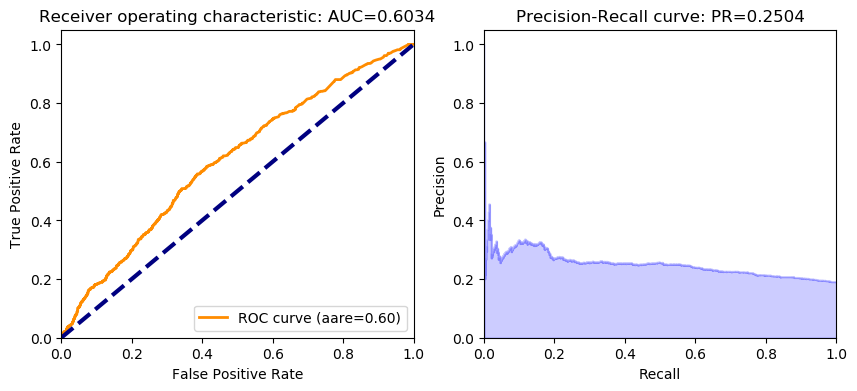

In [111]:
ROC_AUC(glm_v1,test_hex,'loan_default')

In [113]:
# Print the Coefficients table
coefs = glm_v1._model_json['output']['coefficients_table'].as_data_frame()
coefs = pd.DataFrame(coefs)
coefs.sort_values(by='standardized_coefficients',ascending=False)

,names,coefficients,standardized_coefficients
57,TD013,0.020340,0.099305
53,TD005,0.020807,0.056457
55,TD009,0.009396,0.036027
51,TD001,0.004976,0.008895
49,AP008,0.000000,0.000000
56,TD010,0.000000,0.000000
54,TD006,0.000000,0.000000
52,TD002,0.000000,0.000000
50,AP009,0.000000,0.000000
38,MB007.ZTE,0.000000,0.000000


### Now the code works fine with the small dataset, we can model with the entire dataset